# Actividad: Problemas de clasificación

Link del Colab: https://colab.research.google.com/drive/1PLPKWQOA4Lb-Q3oSOPiK2n3af6Z7o0-6?usp=sharing

## Instrucciones
Resuelve de manera individual los siguientes ejercicios en un cuaderno de Jupyter Notebook y responde a los planteamientos indicados en cada uno. Los conjuntos de datos con los que trabajarás así como algunos incisos de los ejercicios dependen de tu número de matrícula.

## Ejercicio 1 (50 puntos)
En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función *loadtxt de numpy*. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.



***Nota:*** El conjunto de datos con el que trabarás en este ejercicio depende del último número de tu matrícula de acuerdo a la siguiente lista:
  - 0 y 1 - P1_1.txt
  - 2 y 3 - P1_2.txt
  - 4 y 5 - P1_3.txt <----------- Este es el mío.
  - 6 y 7 - P1_4.txt
  - 8 y 9 - P1_5.txt

In [124]:
import random
import numpy as np
import pandas as pd
import numpy.linalg as ln
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE

In [125]:
data = np.loadtxt('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/P1_3.txt')
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,1.0,1.0,0.392507,0.676570,0.601804,0.183421,-0.349747,-0.860932,-1.170066,-0.941732,...,-0.254404,-1.136190,-1.730791,-1.184885,0.336431,1.610668,1.756637,1.249758,1.037388,1.055311
1,1.0,1.0,-1.314876,-0.732874,0.414225,0.993659,0.827121,0.456878,0.163193,-0.190862,...,1.424819,0.577741,-0.795678,-1.568335,-1.277742,-0.581167,-0.316463,-0.619896,-1.051373,-1.193381
2,1.0,1.0,-1.093450,-0.689312,0.070827,0.593414,0.638874,0.450695,0.351006,0.467201,...,1.155190,0.562999,0.362539,0.445800,0.361504,0.057792,-0.196191,-0.292260,-0.200058,0.280906
3,1.0,1.0,0.467519,0.107122,-0.012376,-0.153833,-0.486099,-0.732346,-0.591912,-0.152529,...,-1.214025,-0.872625,-0.202612,-0.496235,-1.570830,-1.863332,-0.606062,1.117019,1.740745,0.957655
4,1.0,1.0,0.807108,0.592778,-0.223927,-0.521974,0.147150,0.869226,0.760317,0.237120,...,3.479863,3.431934,2.651050,1.237687,-0.278950,-1.254577,-1.531818,-1.430996,-1.142692,-0.593648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,2.0,1.0,0.784337,1.221407,1.425340,0.986192,-0.099067,-1.469195,-2.522046,-2.716553,...,-2.157874,-0.708740,0.634443,0.960206,0.421172,-0.425893,-1.151539,-1.433819,-1.132209,-0.502840
1790,2.0,1.0,0.269954,0.582897,1.291684,2.033241,1.734560,0.210820,-1.163406,-1.038595,...,-0.043745,-0.177268,-0.581092,-0.952887,-0.744415,-0.109664,-0.117021,-1.411864,-2.910285,-2.654628
1791,2.0,1.0,-0.728536,-0.784221,0.023509,1.035219,1.233705,0.679446,0.508779,1.218627,...,0.531074,0.449477,-0.481237,-1.173309,-0.945430,-0.282519,0.026274,-0.009209,0.121409,0.395237
1792,2.0,1.0,1.771475,0.837355,0.181846,0.443217,0.887551,0.741103,0.326102,0.389141,...,0.061764,-1.155763,-1.496715,-0.718978,0.543028,1.217978,0.754228,-0.457055,-1.524124,-1.738727


In [126]:
data

array([[ 1.        ,  1.        ,  0.3925073 , ...,  1.24975793,
         1.03738802,  1.05531121],
       [ 1.        ,  1.        , -1.31487611, ..., -0.61989557,
        -1.05137325, -1.19338103],
       [ 1.        ,  1.        , -1.09345032, ..., -0.29226011,
        -0.2000579 ,  0.28090627],
       ...,
       [ 2.        ,  1.        , -0.72853565, ..., -0.00920863,
         0.12140923,  0.39523656],
       [ 2.        ,  1.        ,  1.77147543, ..., -0.45705499,
        -1.52412392, -1.73872657],
       [ 2.        ,  1.        ,  0.47996947, ..., -0.18374824,
        -0.69901401, -1.41618733]])

In [127]:
data = np.delete(data, 1, axis=1)
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,1.0,0.392507,0.676570,0.601804,0.183421,-0.349747,-0.860932,-1.170066,-0.941732,-0.055768,...,-0.254404,-1.136190,-1.730791,-1.184885,0.336431,1.610668,1.756637,1.249758,1.037388,1.055311
1,1.0,-1.314876,-0.732874,0.414225,0.993659,0.827121,0.456878,0.163193,-0.190862,-0.572603,...,1.424819,0.577741,-0.795678,-1.568335,-1.277742,-0.581167,-0.316463,-0.619896,-1.051373,-1.193381
2,1.0,-1.093450,-0.689312,0.070827,0.593414,0.638874,0.450695,0.351006,0.467201,0.732557,...,1.155190,0.562999,0.362539,0.445800,0.361504,0.057792,-0.196191,-0.292260,-0.200058,0.280906
3,1.0,0.467519,0.107122,-0.012376,-0.153833,-0.486099,-0.732346,-0.591912,-0.152529,0.351558,...,-1.214025,-0.872625,-0.202612,-0.496235,-1.570830,-1.863332,-0.606062,1.117019,1.740745,0.957655
4,1.0,0.807108,0.592778,-0.223927,-0.521974,0.147150,0.869226,0.760317,0.237120,0.167392,...,3.479863,3.431934,2.651050,1.237687,-0.278950,-1.254577,-1.531818,-1.430996,-1.142692,-0.593648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,2.0,0.784337,1.221407,1.425340,0.986192,-0.099067,-1.469195,-2.522046,-2.716553,-2.064269,...,-2.157874,-0.708740,0.634443,0.960206,0.421172,-0.425893,-1.151539,-1.433819,-1.132209,-0.502840
1790,2.0,0.269954,0.582897,1.291684,2.033241,1.734560,0.210820,-1.163406,-1.038595,0.199829,...,-0.043745,-0.177268,-0.581092,-0.952887,-0.744415,-0.109664,-0.117021,-1.411864,-2.910285,-2.654628
1791,2.0,-0.728536,-0.784221,0.023509,1.035219,1.233705,0.679446,0.508779,1.218627,1.715892,...,0.531074,0.449477,-0.481237,-1.173309,-0.945430,-0.282519,0.026274,-0.009209,0.121409,0.395237
1792,2.0,1.771475,0.837355,0.181846,0.443217,0.887551,0.741103,0.326102,0.389141,0.877296,...,0.061764,-1.155763,-1.496715,-0.718978,0.543028,1.217978,0.754228,-0.457055,-1.524124,-1.738727


### 1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [128]:
df[0].value_counts()

2.0    1496
1.0     298
Name: 0, dtype: int64

Como podemos observar, tenemos mas datos de una clase que de otra, especificamente tenemos muchos mas datos de la clase 2 que de la clase 1. Así que tenemos que balancear.

In [129]:
x = data[:,1:]
y = data[:,0]

Utilizaremos la estrategia de balance 'Subsampling'.



### 2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

#### Linear SVM Classifier

In [130]:
clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

svm_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### KNN

In [131]:
clf = KNeighborsClassifier(n_neighbors=3)
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

knn_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### Decision tree

In [133]:
clf = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

tree_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### Linear Discriminant Analysis

In [134]:
clf = LinearDiscriminantAnalysis()
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

lda_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### RBF-SVM

In [135]:
clf = SVC(kernel = 'rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

rbf_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

Ya que hicimos los 5 modelos, vamos a evaluar los resultados:

In [136]:
print('Linear SVM:\n', svm_report, '\n')
print('KNN:\n', knn_report, '\n')
print('Decision Tree:\n', tree_report, '\n')
print('Linear Discriminant Analysis:\n', lda_report, '\n')
print('RBF-SVM:\n', rbf_report, '\n')

Linear SVM:
               precision    recall  f1-score   support

         1.0       0.50      0.86      0.64       298
         2.0       0.97      0.83      0.89      1496

    accuracy                           0.84      1794
   macro avg       0.74      0.84      0.76      1794
weighted avg       0.89      0.84      0.85      1794
 

KNN:
               precision    recall  f1-score   support

         1.0       0.34      0.82      0.48       298
         2.0       0.95      0.69      0.80      1496

    accuracy                           0.71      1794
   macro avg       0.65      0.75      0.64      1794
weighted avg       0.85      0.71      0.75      1794
 

Decision Tree:
               precision    recall  f1-score   support

         1.0       0.31      0.66      0.42       298
         2.0       0.91      0.71      0.80      1496

    accuracy                           0.70      1794
   macro avg       0.61      0.69      0.61      1794
weighted avg       0.81      0.70  

Si vemos estos resultados, nos podemos dar cuenta en base a la precisión y el recall que tan buenos son los modelos.

La precisión nos dice cuántos de los casos clasificados como positivos realmente lo son.

El recall nos dice cuántos casos positivos reales el modelo logró identificar, o sea, cuán bien atrapa todos los casos positivos. Este es muy importante que se mantenga similar para todas las clases, porque si no, puede significar que nuestros modelo está desbalanceado.

Así que buscaremos el modelo que nos ofrezca el mayor balance de las clases en su recall y la mayor precision promedio entre clases.

Y entre estos modelos, el ganador es el RBF-SVM, con un recall de 0.86 en cada clase y una precision promedio de 0.76.

### 3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

Funciones para el modelo de regresión logistica:

In [137]:
def grad(X, y, beta):
    n = len(y)
    xbeta = X @ beta
    exp = np.exp(-xbeta)
    res = y - 1/(1+exp)
    tmp = (exp/((1+exp)**2)) * res*X.transpose()
    return -(2/n)*tmp.sum(axis = 1)

def predict(X, beta):
    xbeta = X @ beta
    tmp = 1./(1.+np.exp(-xbeta))
    return (tmp > 0.5).astype("int32")

def fit_model(X, y, alpha = 0.005, maxit = 10000):

    # Number of predictors
    npredictors = X.shape[1]

    # Initialize beta
    beta = 2*np.random.rand(npredictors) - 1.0

    # Optimization algorithm
    it = 0
    while (ln.norm(grad(X, y, beta)) > 1e-4) and (it < maxit):
        beta = beta - alpha*grad(X, y, beta)
        it = it + 1
        #print(beta)

    return beta

In [138]:
X = np.column_stack((np.ones(x.shape[0]), x))

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    beta_cv = fit_model(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.19      0.86      0.31       298
         2.0       0.00      0.00      0.00      1496

    accuracy                           0.14      1794
   macro avg       0.06      0.29      0.10      1794
weighted avg       0.03      0.14      0.05      1794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Como podemos observar, no es un muy buen modelo, nos esta dando una precision y un recall bastante malos. De hecho hasta nos creó una tercera clase.

### 4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

Arbol de decisión con metodo Filter:

---- n features = 1
ACC: 0.5663263877001603
---- n features = 2
ACC: 0.608684894414964
---- n features = 3
ACC: 0.6147990227354072
---- n features = 4
ACC: 0.6376542537464402
---- n features = 5
ACC: 0.6610805932058325
---- n features = 6
ACC: 0.675036180576088
---- n features = 7
ACC: 0.7051244144971289
---- n features = 8
ACC: 0.6890073294844463
---- n features = 9
ACC: 0.7179517903549586
---- n features = 10
ACC: 0.7207466425981544
---- n features = 11
ACC: 0.7151429327274708
---- n features = 12
ACC: 0.7179284480478051
---- n features = 13
ACC: 0.7307822785204089
---- n features = 14
ACC: 0.7257745755590483
---- n features = 15
ACC: 0.7274272109055258
---- n features = 16
ACC: 0.7251770124959152
---- n features = 17
ACC: 0.73855059834114
---- n features = 18
ACC: 0.7502544311479747
---- n features = 19
ACC: 0.7262974432392898
---- n features = 20
ACC: 0.7330200276995379
---- n features = 21
ACC: 0.7263207855464434
---- n features = 22
ACC: 0.7123869843295311
---- n features = 23
AC

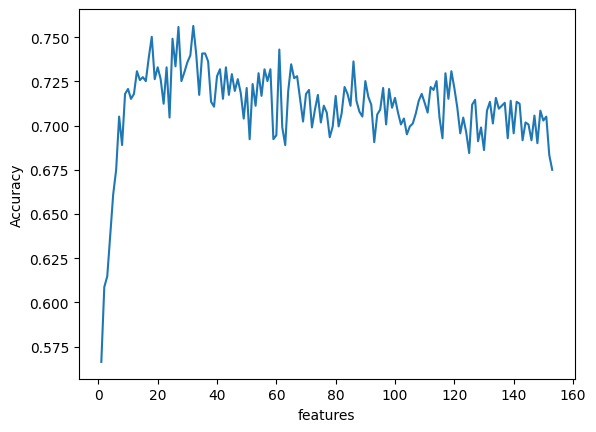

In [141]:
clf = DecisionTreeClassifier()
acc_nfeat = []
n_feats = []

for i in range(1, df.shape[1]): # Creating the list with the number of features
  n_feats.append(i)

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.sample([i for i in range(n2)], n1)

        x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
        y_sub = np.concatenate((y1, y2[ind]), axis=0)

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_sub = fselection_cv.transform(x_sub)

        clf.fit(x_sub, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("\nOptimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

### 5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.

**Por cuestiones de tiempo, a los metodos siguientes metodos se mostrará unicamente su código, no sus resultados, ya que con tantas caracteristicas, tarda mucho en poder procesar todas.**

Arbol de decisión con metodo Wrapper:

In [ ]:
clf = DecisionTreeClassifier()
acc_nfeat = []
n_feats = []

for i in range(1, 41): # Creating the list with the number of features
  n_feats.append(i)

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.sample([i for i in range(n2)], n1)

        x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
        y_sub = np.concatenate((y1, y2[ind]), axis=0)

        fselection_cv = SequentialFeatureSelector(clf, n_features_to_select=n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_sub = fselection_cv.transform(x_sub)

        clf.fit(x_sub, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("\nOptimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

### 6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.

Arbol de decisión con metodo Filter-Wrapper:

In [ ]:
clf = DecisionTreeClassifier()
acc_nfeat = []
n_feats = []

for i in range(1, 41): # Creating the list with the number of features
  n_feats.append(i)

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.sample([i for i in range(n2)], n1)

        x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
        y_sub = np.concatenate((y1, y2[ind]), axis=0)

        fselection_cv = RFE(clf, n_features_to_select=n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_sub = fselection_cv.transform(x_sub)

        clf.fit(x_sub, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("\nOptimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

### 7. Escoge alguna de las técnicas de selección de características que probaste con anterioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
  - Aplica el método de selección de características con todos los datos.
  - Ajusta el modelo con las características encontradas.

Clasificador SVM-RBF con metodo Filter:

In [143]:
clf = SVC(kernel = 'rbf')

x1 = x[y==1, :]
y1 = y[y==1]
n1 = len(y1)

x2 = x[y==2, :]
y2 = y[y==2]
n2 = len(y2)

ind = random.sample([i for i in range(n2)], n1)

x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
y_sub = np.concatenate((y1, y2[ind]), axis=0)

fselection = SelectKBest(f_classif, k = 32)
fselection.fit(x_sub, y_sub)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

Selected features:  ['x10' 'x11' 'x12' 'x13' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22'
 'x25' 'x26' 'x27' 'x28' 'x29' 'x30' 'x61' 'x64' 'x65' 'x66' 'x76' 'x77'
 'x78' 'x104' 'x105' 'x111' 'x112' 'x113' 'x114' 'x128']


SVC()

### 8. Contesta las siguientes preguntas:
- ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?

  Nuestro modelo podría quedar desbalanceado, o sea, que si una clase tiene muchas muestras y la otra no tantas, nuestro modelo se volverá muy bueno prediciendo la clase con mas muestras y no tanto con la clase con menos muestras. Tambien el modelo será más propenso a dar falsos positivos.

  Y esto es porque el modelo al tener mas muestras de una clase, tiene mas oportunidad de entrenarse en dicha clase, y tiende a ignorar en menor o mayor medida a la clase con menos nuestras.

- De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

  El clasificador que considero mejor para los datos es el SVM-RBF. La razón es que tiene un recall muy bueno, bastante alto y sobre todo, balanceado entre ambas clases, y su precisión promedio fue la más alta entre los 5 clasificadores.

- ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

  Depende, cuando seleccionamos algunas caracteristicas para descartar otras, estamos optimizando el modelo, haciendolo que sea mejor en sus predicciones; pero tambien cuando quitamos algunos datos (filas) para balancear el conjunto de datos, estamos perdiendo información util que afectan el rendimiento del modelo. Pero al final de cuentas, todos estos procedimientos son para mejorar el modelo, así que podríamos decir que sí es posible.

- ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

  Por la eficiencia y tiempo con los datos, yo escogería el metodo Filter.

- Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

  Podríamos evaluar mas modelos, y el mejor modelo lo evaluamos con cada uno de los metodos de seleccion de caracteristicas y someterlos a metricas para ver cual es el mejor modelo con las mejores caracteristicas. Y dependiendo del modelo, podríamos calcular sus mejores hiperparametros.

## Ejercicio 2 (50 puntos)

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.

In [144]:
data = np.loadtxt('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/M_5.txt')
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,622,623,624,625,626,627,628,629,630,631
0,1.0,1.0,0.159910,0.829038,-0.236322,-1.137015,0.049065,-1.331090,0.081879,0.711929,...,1.089978,0.792285,0.620556,1.706724,1.300995,2.657723,3.154306,0.878554,1.636039,1.608969
1,1.0,1.0,-1.039646,0.061581,-0.372804,-0.315868,0.351879,-1.399993,-0.981714,-0.270857,...,1.119629,0.628695,0.612871,1.071359,0.202072,1.593484,1.701584,0.676104,0.750549,1.040066
2,1.0,1.0,-1.411644,-1.090915,-1.164213,-1.041624,0.055639,-2.163669,-1.410827,-1.203229,...,1.744339,0.594228,0.193274,1.513130,0.243519,2.063922,2.358042,0.362039,1.591779,1.533007
3,1.0,1.0,-2.645974,0.129788,2.822250,-1.345104,-0.196804,3.303073,-3.014899,0.296256,...,-0.131614,2.668423,0.246769,-0.731673,0.083187,-0.341975,0.623000,2.532194,0.344601,-0.867472
4,1.0,1.0,-1.692860,-1.597632,-2.690969,-0.413617,-1.163711,-2.757666,-1.719198,-1.590400,...,1.232341,1.673651,0.708430,0.716460,0.879053,0.863195,1.854850,1.384722,0.452318,0.756299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,7.0,1.0,-7.042298,-6.180162,-4.875976,-7.048198,-7.099642,-4.785359,-6.666241,-5.605844,...,-6.052498,-3.797382,-2.099982,-5.288162,-8.659876,-5.765801,-6.076196,-3.995645,-2.019535,-5.416307
625,7.0,1.0,-6.826647,-5.981072,-4.807238,-7.361130,-6.843612,-4.523671,-6.360528,-5.464410,...,-6.663666,-3.822543,-2.207166,-6.080966,-9.546079,-6.164407,-5.756409,-3.972872,-2.120018,-6.187842
626,7.0,1.0,-7.717987,-5.548352,-4.399172,-6.311186,-7.481042,-4.227248,-6.762767,-5.011221,...,-7.644948,-4.881979,-2.119652,-7.133171,-9.829067,-6.619432,-7.270555,-5.149267,-2.027003,-7.510790
627,7.0,1.0,-7.447476,-5.223852,-4.073834,-6.553809,-7.143856,-3.894904,-6.507190,-4.696319,...,-7.916474,-3.864058,-1.737035,-7.348957,-10.380257,-6.737896,-7.270802,-4.120117,-1.654364,-7.704782


In [145]:
data = np.delete(data, 1, axis=1)
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,621,622,623,624,625,626,627,628,629,630
0,1.0,0.159910,0.829038,-0.236322,-1.137015,0.049065,-1.331090,0.081879,0.711929,-0.935375,...,1.089978,0.792285,0.620556,1.706724,1.300995,2.657723,3.154306,0.878554,1.636039,1.608969
1,1.0,-1.039646,0.061581,-0.372804,-0.315868,0.351879,-1.399993,-0.981714,-0.270857,-1.361964,...,1.119629,0.628695,0.612871,1.071359,0.202072,1.593484,1.701584,0.676104,0.750549,1.040066
2,1.0,-1.411644,-1.090915,-1.164213,-1.041624,0.055639,-2.163669,-1.410827,-1.203229,-2.505298,...,1.744339,0.594228,0.193274,1.513130,0.243519,2.063922,2.358042,0.362039,1.591779,1.533007
3,1.0,-2.645974,0.129788,2.822250,-1.345104,-0.196804,3.303073,-3.014899,0.296256,3.548283,...,-0.131614,2.668423,0.246769,-0.731673,0.083187,-0.341975,0.623000,2.532194,0.344601,-0.867472
4,1.0,-1.692860,-1.597632,-2.690969,-0.413617,-1.163711,-2.757666,-1.719198,-1.590400,-4.589909,...,1.232341,1.673651,0.708430,0.716460,0.879053,0.863195,1.854850,1.384722,0.452318,0.756299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,7.0,-7.042298,-6.180162,-4.875976,-7.048198,-7.099642,-4.785359,-6.666241,-5.605844,-8.568677,...,-6.052498,-3.797382,-2.099982,-5.288162,-8.659876,-5.765801,-6.076196,-3.995645,-2.019535,-5.416307
625,7.0,-6.826647,-5.981072,-4.807238,-7.361130,-6.843612,-4.523671,-6.360528,-5.464410,-8.984147,...,-6.663666,-3.822543,-2.207166,-6.080966,-9.546079,-6.164407,-5.756409,-3.972872,-2.120018,-6.187842
626,7.0,-7.717987,-5.548352,-4.399172,-6.311186,-7.481042,-4.227248,-6.762767,-5.011221,-9.086376,...,-7.644948,-4.881979,-2.119652,-7.133171,-9.829067,-6.619432,-7.270555,-5.149267,-2.027003,-7.510790
627,7.0,-7.447476,-5.223852,-4.073834,-6.553809,-7.143856,-3.894904,-6.507190,-4.696319,-8.148380,...,-7.916474,-3.864058,-1.737035,-7.348957,-10.380257,-6.737896,-7.270802,-4.120117,-1.654364,-7.704782


### 1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.


In [146]:
df[0].value_counts()

1.0    90
2.0    90
3.0    90
4.0    90
5.0    90
6.0    90
7.0    89
Name: 0, dtype: int64

Nuestras muestras estan balanceadas por clases.

### 2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [164]:
x = data[:,1:]
y = data[:,0]

#### Linear SVM Classifier

In [166]:
clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

svm_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### KNN

In [167]:
clf = KNeighborsClassifier(n_neighbors=3)
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    clf.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

knn_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### Decision tree

In [151]:
clf = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    clf.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

tree_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### Linear Discriminant Analysis

In [152]:
clf = LinearDiscriminantAnalysis()
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    clf.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

lda_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

#### RBF-SVM

In [153]:
clf = SVC(kernel = 'rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    clf.fit(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

rbf_report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

Ya que hicimos los 5 modelos, vamos a evaluar los resultados:

In [168]:
print('Linear SVM:\n', svm_report, '\n')
print('KNN:\n', knn_report, '\n')
print('Decision Tree:\n', tree_report, '\n')
print('Linear Discriminant Analysis:\n', lda_report, '\n')
print('RBF-SVM:\n', rbf_report, '\n')

Linear SVM:
               precision    recall  f1-score   support

         1.0       0.95      0.93      0.94        90
         2.0       0.68      0.63      0.66        90
         3.0       0.98      0.97      0.97        90
         4.0       0.99      0.97      0.98        90
         5.0       0.97      0.97      0.97        90
         6.0       0.68      0.76      0.72        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.89       629
   macro avg       0.89      0.89      0.89       629
weighted avg       0.89      0.89      0.89       629
 

KNN:
               precision    recall  f1-score   support

         1.0       0.97      0.93      0.95        90
         2.0       0.65      0.56      0.60        90
         3.0       1.00      0.92      0.96        90
         4.0       1.00      0.97      0.98        90
         5.0       0.94      0.90      0.92        90
         6.0       0.61      0.81      0.70        90
   

Entre estos 5 modelos, hay 3 que destacan, que son:

- Linear SVM
- KNN
- SVM-RBF

Estos 3 modelos tienen una muy buena precisión promedio, y un muy buen recall promedio. Pero yo me inclino más por el modelo Linear SVM porque, aunque es poca la diferencia, tiene mejor precisión y recall que los otros.

### 3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.


#### Linear SVM:

---- C = 0.001
ACC: 0.8918857142857144
---- C = 0.0010974987654930556
ACC: 0.9061968253968254
---- C = 0.0012045035402587824
ACC: 0.9077968253968255
---- C = 0.0013219411484660286
ACC: 0.9092825396825397
---- C = 0.0014508287784959402
ACC: 0.8982857142857142
---- C = 0.0015922827933410922
ACC: 0.9126222222222221
---- C = 0.001747528400007683
ACC: 0.9030095238095237
---- C = 0.0019179102616724887
ACC: 0.8982984126984126
---- C = 0.00210490414451202
ACC: 0.9078095238095238
---- C = 0.0023101297000831605
ACC: 0.9076571428571428
---- C = 0.0025353644939701114
ACC: 0.9141714285714286
---- C = 0.0027825594022071257
ACC: 0.9093460317460318
---- C = 0.0030538555088334154
ACC: 0.9173587301587303
---- C = 0.003351602650938841
ACC: 0.9077587301587302
---- C = 0.0036783797718286343
ACC: 0.9141968253968255
---- C = 0.004037017258596553
ACC: 0.9014349206349207
---- C = 0.004430621457583882
ACC: 0.9157333333333334
---- C = 0.004862601580065354
ACC: 0.9030222222222223
---- C = 0.005336699231206312
ACC

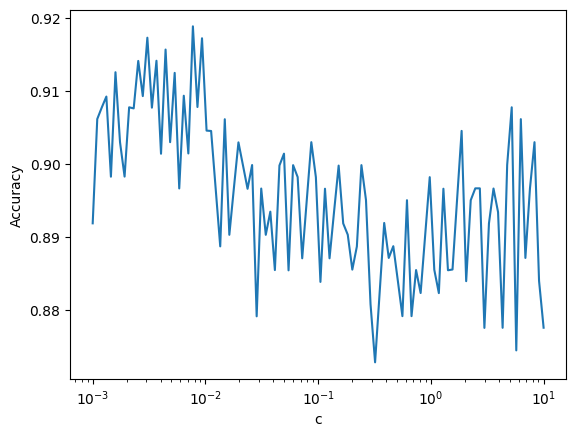

SVC(C=0.007742636826811269, kernel='linear')

In [157]:
cc = np.logspace(-3, 1, 100)

acc = []

for c in cc:
    print('---- C =', c)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(C=c, kernel = 'linear')

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("\nOptimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)

#### SVM-RBF

---- gamma = 1e-05
ACC: 0.7187047619047618
---- gamma = 1.0974987654930568e-05
ACC: 0.7091428571428571
---- gamma = 1.2045035402587812e-05
ACC: 0.6916444444444444
---- gamma = 1.3219411484660286e-05
ACC: 0.70264126984127
---- gamma = 1.4508287784959402e-05
ACC: 0.7057777777777778
---- gamma = 1.5922827933410938e-05
ACC: 0.7074412698412699
---- gamma = 1.747528400007683e-05
ACC: 0.7217523809523809
---- gamma = 1.917910261672489e-05
ACC: 0.7170539682539683
---- gamma = 2.104904144512022e-05
ACC: 0.7297015873015873
---- gamma = 2.310129700083158e-05
ACC: 0.7424126984126984
---- gamma = 2.5353644939701114e-05
ACC: 0.7456888888888888
---- gamma = 2.782559402207126e-05
ACC: 0.7456761904761905
---- gamma = 3.053855508833412e-05
ACC: 0.753511111111111
---- gamma = 3.351602650938841e-05
ACC: 0.7662857142857142
---- gamma = 3.678379771828634e-05
ACC: 0.7694730158730158
---- gamma = 4.037017258596558e-05
ACC: 0.7838730158730158
---- gamma = 4.430621457583878e-05
ACC: 0.7806984126984127
---- gamma

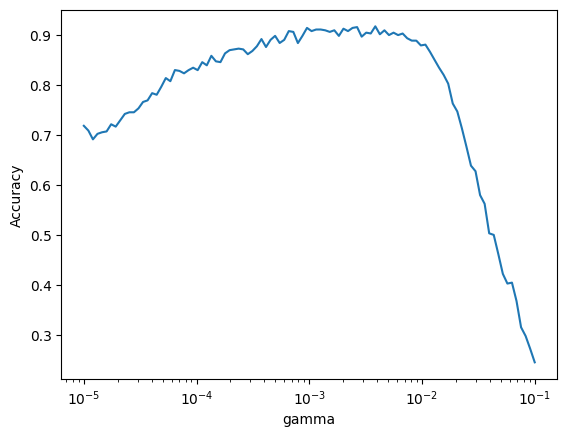

SVC(gamma=0.0038535285937105314)

In [161]:
gg = np.logspace(-5, -1, 100)

acc = []

for g in gg:
    print('---- gamma =', g)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel ='rbf', gamma = g)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = gg[opt_index]
print("\nOptimal gamma: ", opt_hyperparameter)

plt.plot(gg, acc)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel ='rbf', gamma = opt_hyperparameter)
clf.fit(x, y)

### 4. Prepara tus modelos para producción haciendo lo siguiente:
  - Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
  - Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.


#### Linear SVM

---- C = 0.001
ACC: 0.9427662957074722
---- C = 0.0010974987654930556
ACC: 0.9475357710651828
---- C = 0.0012045035402587824
ACC: 0.9491255961844197
---- C = 0.0013219411484660286
ACC: 0.9491255961844197
---- C = 0.0014508287784959402
ACC: 0.9523052464228935
---- C = 0.0015922827933410922
ACC: 0.9523052464228935
---- C = 0.001747528400007683
ACC: 0.9538950715421304
---- C = 0.0019179102616724887
ACC: 0.9554848966613673
---- C = 0.00210490414451202
ACC: 0.9570747217806042
---- C = 0.0023101297000831605
ACC: 0.9570747217806042
---- C = 0.0025353644939701114
ACC: 0.9570747217806042
---- C = 0.0027825594022071257
ACC: 0.9570747217806042
---- C = 0.0030538555088334154
ACC: 0.9570747217806042
---- C = 0.003351602650938841
ACC: 0.958664546899841
---- C = 0.0036783797718286343
ACC: 0.9618441971383148
---- C = 0.004037017258596553
ACC: 0.9634340222575517
---- C = 0.004430621457583882
ACC: 0.9650238473767886
---- C = 0.004862601580065354
ACC: 0.9666136724960255
---- C = 0.005336699231206312
ACC:

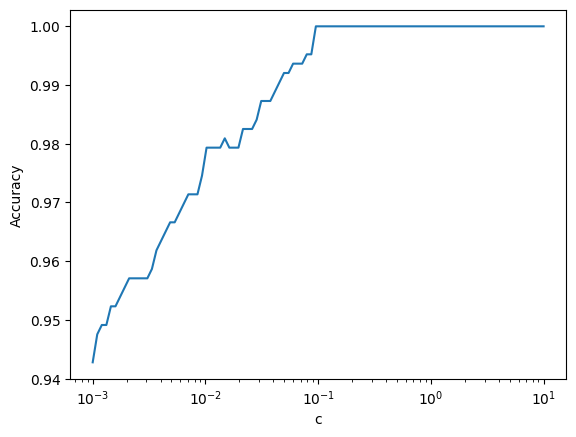

SVC(C=0.09545484566618342, kernel='linear')

In [160]:
cc = np.logspace(-3, 1, 100)

acc = []

for c in cc:
    print('---- C =', c)

    clf_cv = SVC(C=c, kernel = 'linear')
    clf_cv.fit(x, y)

    y_pred = clf_cv.predict(x)

    acc_i = accuracy_score(y, y_pred)
    acc.append(acc_i)
    print('ACC:', acc_i)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("\nOptimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)

#### SVM-RBF

---- gamma = 0.001
ACC: 0.9602543720190779
---- gamma = 0.0010974987654930556
ACC: 0.9634340222575517
---- gamma = 0.0012045035402587824
ACC: 0.9650238473767886
---- gamma = 0.0013219411484660286
ACC: 0.9682034976152624
---- gamma = 0.0014508287784959402
ACC: 0.9697933227344993
---- gamma = 0.0015922827933410922
ACC: 0.9697933227344993
---- gamma = 0.001747528400007683
ACC: 0.972972972972973
---- gamma = 0.0019179102616724887
ACC: 0.9745627980922098
---- gamma = 0.00210490414451202
ACC: 0.9761526232114467
---- gamma = 0.0023101297000831605
ACC: 0.9793322734499205
---- gamma = 0.0025353644939701114
ACC: 0.9825119236883942
---- gamma = 0.0027825594022071257
ACC: 0.985691573926868
---- gamma = 0.0030538555088334154
ACC: 0.985691573926868
---- gamma = 0.003351602650938841
ACC: 0.9888712241653418
---- gamma = 0.0036783797718286343
ACC: 0.9920508744038156
---- gamma = 0.004037017258596553
ACC: 0.9920508744038156
---- gamma = 0.004430621457583882
ACC: 0.9920508744038156
---- gamma = 0.0048626

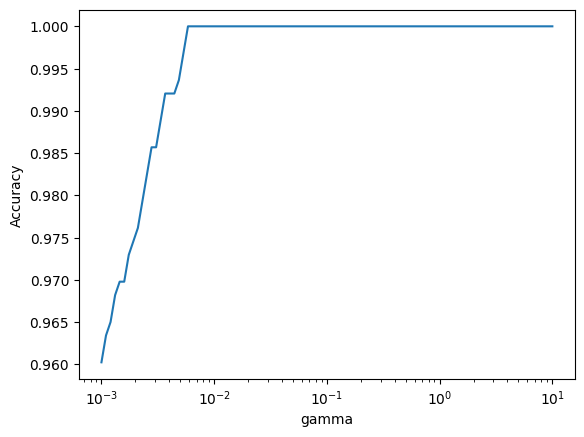

SVC(gamma=0.005857020818056668)

In [162]:
gg = np.logspace(-3, 1, 100)

acc = []

for g in gg:
    print('---- gamma =', g)

    clf_cv = SVC(kernel ='rbf', gamma = g)

    clf_cv.fit(x, y)

    y_pred = clf_cv.predict(x)

    acc_i = accuracy_score(y, y_pred)
    acc.append(acc_i)
    print('ACC:', acc_i)

opt_index = np.argmax(acc)
opt_hyperparameter = gg[opt_index]
print("\nOptimal Gamma: ", opt_hyperparameter)

plt.plot(gg, acc)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel ='rbf', gamma = opt_hyperparameter)
clf.fit(x, y)

Hay que aclarar que estas graficas no son de evaluación del modelo, son solo una demostración de los resultados del modelo, ya que estas predicciones se estan haciendo con los mismos datos con los que se entrenó el modelo, o sea, todos los datos.

### 5. Contesta lo siguientes:
  - ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?

  No particularmente, todas las clases mantienen un buen balance. Todas las muestras de cada clase mantienen practicamente el mismo numero de muestras. Solo en el recall no están completamente iguales los recall de cada clase, pero no se alejan mucho entre sí, solo una o dos clases.

  - ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.

  Hubo 3 modelos muy buenos, ordenados del mejor al peor:
    - Linear SVM
    - SVM-RBF
    - KNN
  
  Como expliqué anteriormente, estos 3 modelos mantienen una muy buena precisión promedio y un muy buen recall promedio tambien.

  Una observación interesante es que los dos mejores modelos son clasificadores basados en Maquinas Soporte Vectorial (SVM).

  - ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.

  Pues la accuracy de los modelos aumentó, no mucho, pero hizo más exacto al modelo. Los 3 mejores modelos aumentaron su accuracy como entre un 0.05 y un 0.08.

  - ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?

  Encontrar los hiperparametros perfectos puede llevar mucho procesamiento al momento de probar tantas opciones, y esto es un gran costo computacional. Tambien podría generarse sobreajuste al hondar mucho en los parametros porque podría ser que se encuentre el hiperparametro perfecto, pero para este conjunto de datos, exclusivamente.